<a href="https://colab.research.google.com/github/Rauloigs/Fin-Technical-Analysis/blob/main/random_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Walk Generation

In [ ]:
import pandas as pd
import numpy as np

def gbm3(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
  '''
  Evolution of a stock price using a Geometric Brownian Motion Model
  '''
  # dt is 1 year / steps
  dt = 1/steps_per_year
  n_steps = int(n_years*steps_per_year)
  # column scenarios / n_steps rows
  xi = np.random.normal(size=(n_steps, n_scenarios))
  rets = mu*dt + sigma*np.sqrt(dt)*xi
  rets = pd.DataFrame(rets)
  # rets to prices
  prices = s_0*(1+rets).cumprod()
  return prices

In [ ]:
p = gbm3(10, n_scenarios=3)

In [ ]:
p.shape

(120, 3)

In [ ]:
# Each column is how a stock price can evolve
p.head()

,0,1,2
0,93.177196,102.011138,84.864690
1,92.248334,102.341689,86.917109
2,93.054518,95.310472,83.482444
3,92.698155,95.056589,81.196941
4,88.838016,93.934823,81.916473


<Axes: >

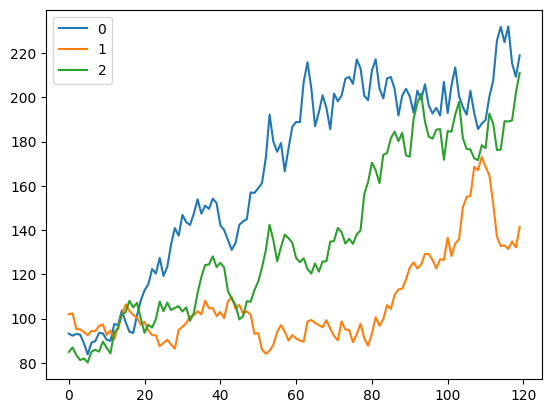

In [ ]:
p.plot()

In [ ]:
p = gbm3(n_years=10, n_scenarios=1000)

In [ ]:
# Make more efficient our function code

def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
  '''
  Evolution of a stock price using a Geometric Brownian Motion Model
  '''
  # dt is 1 year / steps
  dt = 1/steps_per_year
  n_steps = int(n_years*steps_per_year)
  # column scenarios / n_steps rows
  xi = np.random.normal(size=(n_steps, n_scenarios))
  rets = mu*dt + sigma*np.sqrt(dt)*xi
  rets = pd.DataFrame(rets)
  # rets to prices
  prices = s_0*(1+rets).cumprod()
  return prices

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
  '''
  Evolution of a stock price using a Geometric Brownian Motion Model
  '''
  # dt is 1 year / steps
  dt = 1/steps_per_year
  n_steps = int(n_years*steps_per_year)
  # column scenarios / n_steps rows
  rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
  # rets to prices
  prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
  return prices

In [ ]:
%timeit gbm0(n_years=5, n_scenarios=1000)

3.18 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit gbm(n_years=5, n_scenarios=1000)

2.68 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<Axes: >

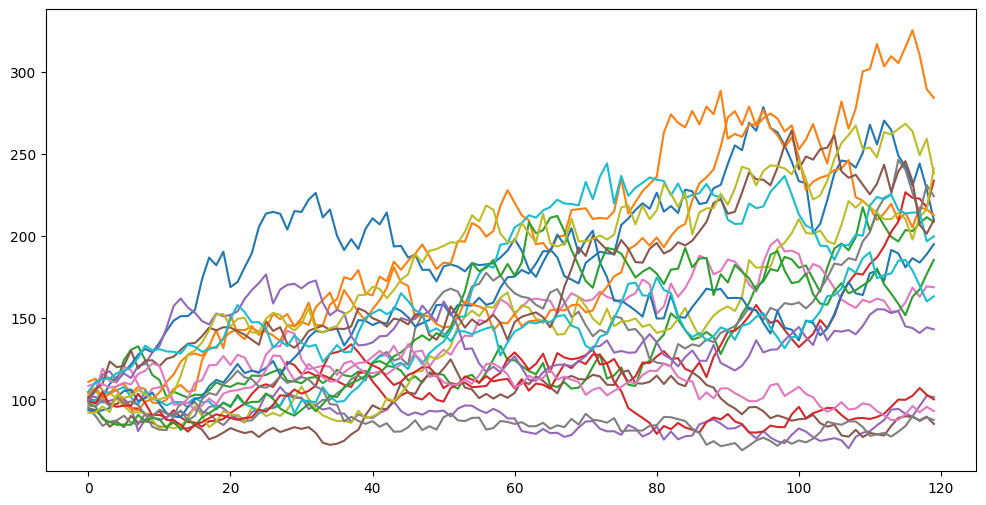

In [ ]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12, 6))

In [ ]:
def gbm_one(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
  '''
  Evolution of a stock price using a Geometric Brownian Motion Model
  '''
  # dt is 1 year / steps
  dt = 1/steps_per_year
  n_steps = int(n_years*steps_per_year)
  rets_plus_1 = np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps, n_scenarios))
  # Give a value of one to that first return
  rets_plus_1[0] = 1
  prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
  return prices

<Axes: >

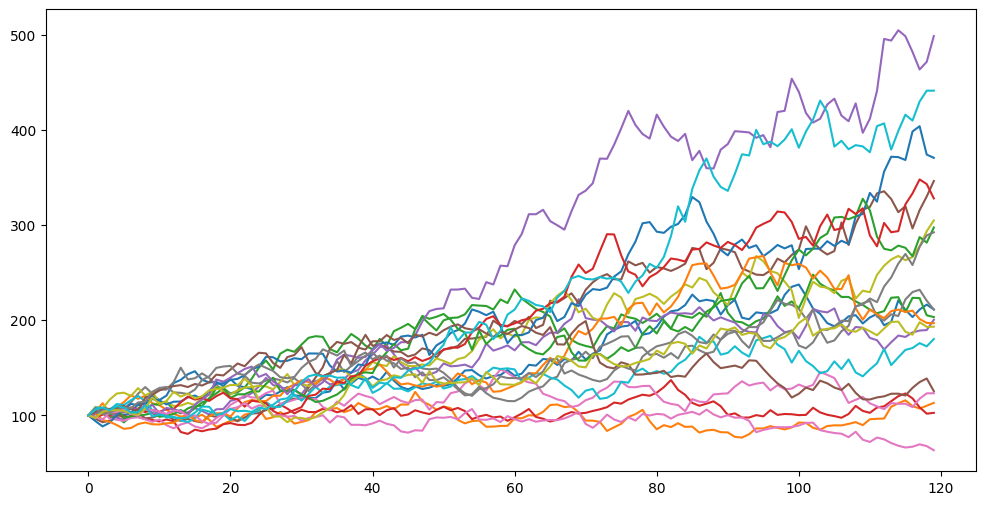

In [ ]:
gbm_one(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12, 6))

In [ ]:
gbm_one(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,94.333670,102.582933,101.890683,104.402746,98.581600,97.533264,94.804338,102.823815,94.942487,95.631173
2,99.282225,111.397364,103.378426,100.960886,94.591986,100.575017,97.525389,103.849870,94.381054,99.575852
3,95.084159,109.622360,106.518025,102.740493,92.654183,96.794278,96.840299,99.431198,95.861520,102.139289
4,102.016549,117.672688,98.683560,105.361709,94.827263,97.133573,95.799219,96.855717,97.811592,100.543320


In [ ]:
%load_ext autoreload
%autoreload 2

# Matplot lib / not necessary here in colab
%matplotlib inline

# Remember: !cp -path /content
!cp /content/drive/MyDrive/rigs/courses/finance/modules/modules_py/edhec_risk_kit.py /content

import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
 # Install the widgets!
%pip install -q ipywidgets
from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00


interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

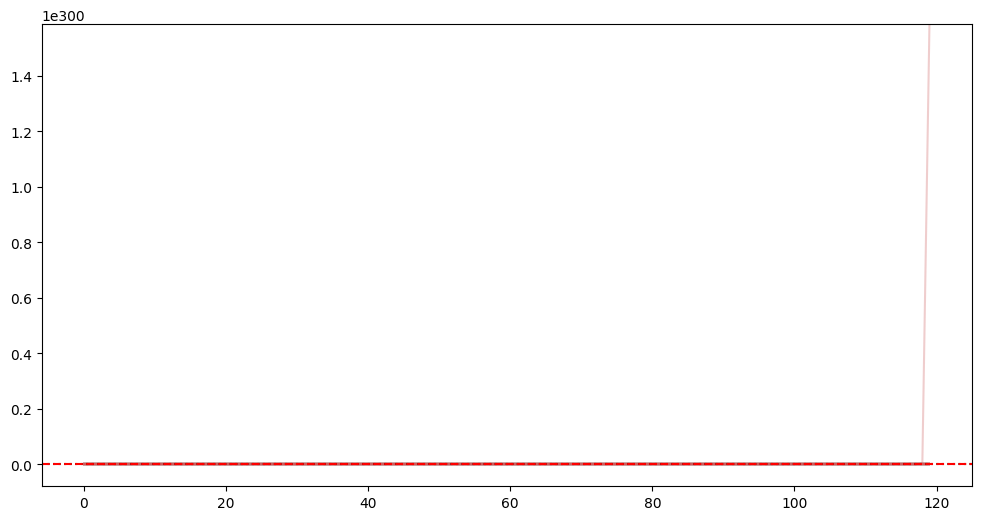

In [ ]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
  '''
  Plot the results of a Monte Carlo Simulation of CPPI
  '''
  start=100
  # sim_rets = gbm_one(n_scenarios=n_scenarios, mu=mu, sigma=sigma, steps_per_year=12)
  sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
  risky_r = pd.DataFrame(sim_rets)
  # run the "back"-test
  btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
  wealth = btr['Wealth']
  y_max = wealth.values.max()*y_max/100
  ax = wealth.plot(legend=False, alpha= 0.3, color='indianred', figsize=(12, 6))
  ax.axhline(y=start, ls=':', color='black')
  ax.axhline(y=start*floor, ls='--', color='red')
  ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1, 5, .5),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                            description='Zoom Y Axis')
                                    )
display(cppi_controls)